# 1. Business Understanding

Due to the large selection that Netflix has to offer, it is difficult for users to find suitable movies for themselves. Searching the library takes a lot of time and creates a poor user experience, which in turn leads to higher cancellation rates.
In order to reduce the cancellation rates, it is necessary to check whether customer satisfaction can be increased by applying machine learning in relation to movie recommendations.


The dataset contains movie data from tmdb Dataset.
Find out factors that can be taken based on the data regarding popularity or rating of the movies to develop strategies for the business.
Based on the above business problem, we define dependent variable(y)

Problem 1 : y = popularity / vote_average (regression problem)

# 2. Data and Data Understanding

It can be seen from the data set that both numbers and categorical values are included. Each category refers to the corresponding film in the row. For example, the "crew" column contains several contributors such as authors, film editor, etc., while "cast" contains the actors who star in the respective films. In addition, each movie has a unique ID, like movie_id/id, which is identical to each other and makes it possible to combine both data sets. All data is very understandable and self-explanatory, and the content is explicitly described on kaggle.com.

## 2.1 Import of Relevant Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set()


# statsmodels benötigt diese Funktion (chisqprob) von skipy für Berichte
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## 2.2 Read Data

In [2]:
original_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Increase_customer_satisfaction_tmdb_5000_movies.csv')

In [3]:
original_data2 = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Increase_customer_satisfaction_tmdb_5000_credits.csv')

In [4]:
original_data = pd.merge(original_data, original_data2)

### Data Understanding

In [5]:
original_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
original_data.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
count,4.809000e+03,4809,1713,4809.000000,4809,4809,4809,4806,4809.000000,4809,...,4807.000000,4809,4809,3965,4809,4809.000000,4809.000000,4809.000000,4809,4809
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,...,NaN,544,3,3944,4800,NaN,NaN,NaN,4761,4776
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,NaN,[],...,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Out of the Blue,NaN,NaN,NaN,[],[]
freq,NaN,372,4,NaN,412,4510,4,2,NaN,352,...,NaN,3175,4801,3,4,NaN,NaN,NaN,43,28
mean,2.902780e+07,NaN,NaN,57120.571429,NaN,NaN,NaN,NaN,21.491664,NaN,...,106.882255,NaN,NaN,NaN,NaN,6.092514,690.331670,57120.571429,NaN,NaN
std,4.070473e+07,NaN,NaN,88653.369849,NaN,NaN,NaN,NaN,31.803366,NaN,...,22.602535,NaN,NaN,NaN,NaN,1.193989,1234.187111,88653.369849,NaN,NaN
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,NaN,NaN
25%,7.800000e+05,NaN,NaN,9012.000000,NaN,NaN,NaN,NaN,4.667230,NaN,...,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000,9012.000000,NaN,NaN
50%,1.500000e+07,NaN,NaN,14624.000000,NaN,NaN,NaN,NaN,12.921594,NaN,...,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000,14624.000000,NaN,NaN
75%,4.000000e+07,NaN,NaN,58595.000000,NaN,NaN,NaN,NaN,28.350529,NaN,...,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000,58595.000000,NaN,NaN


In [7]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

## 2.3 Data Cleaning

### Check for Null-Values

In [8]:
original_data.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [9]:
df_wo_null = original_data.dropna(axis=0)

In [10]:
df_wo_null.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

### Check for Duplicates

In [11]:
df_wo_null[df_wo_null.duplicated(keep=False)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew


## 2.4 Test for Multicollinearity

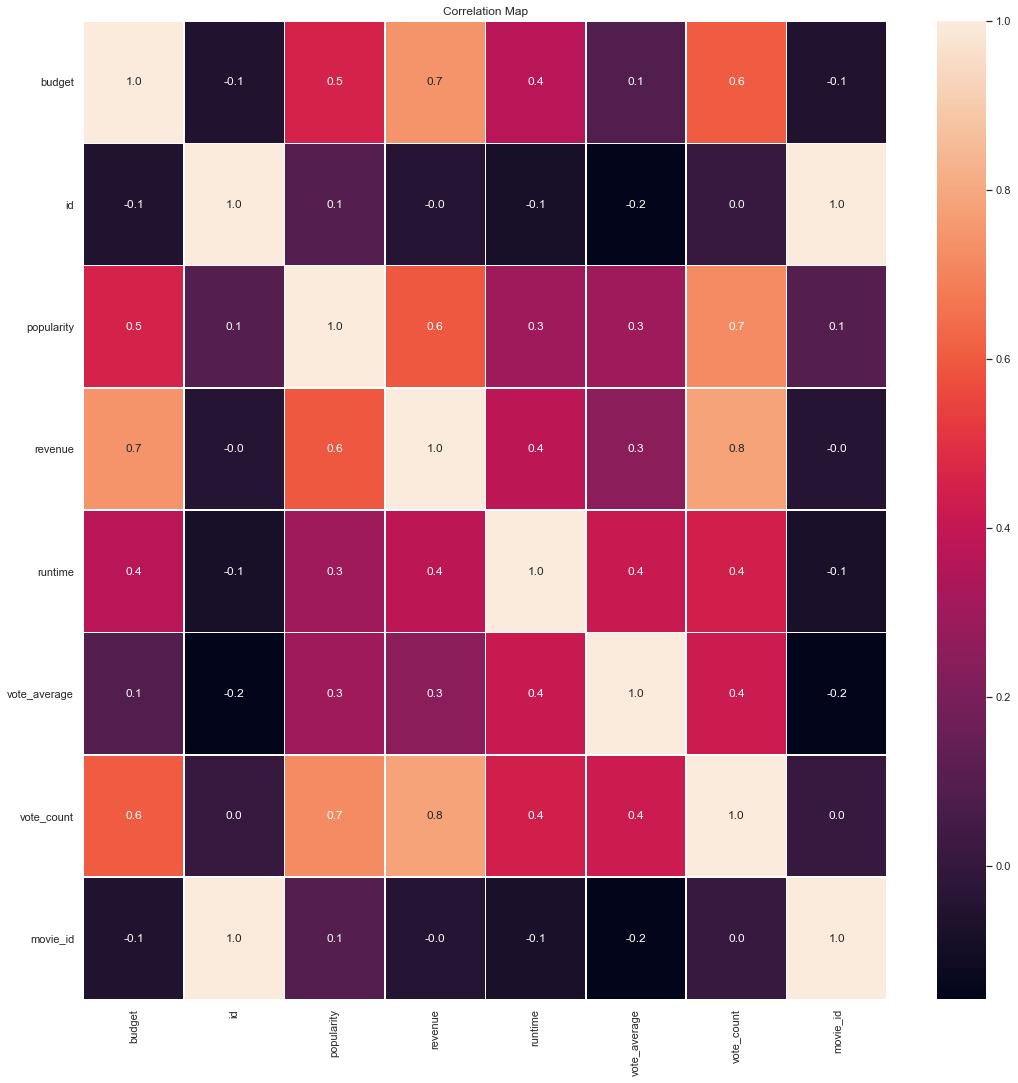

In [12]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_wo_null.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [13]:
df_wo_null = df_wo_null.drop(['tagline', 'homepage', 'id', 'movie_id'], axis = 1)

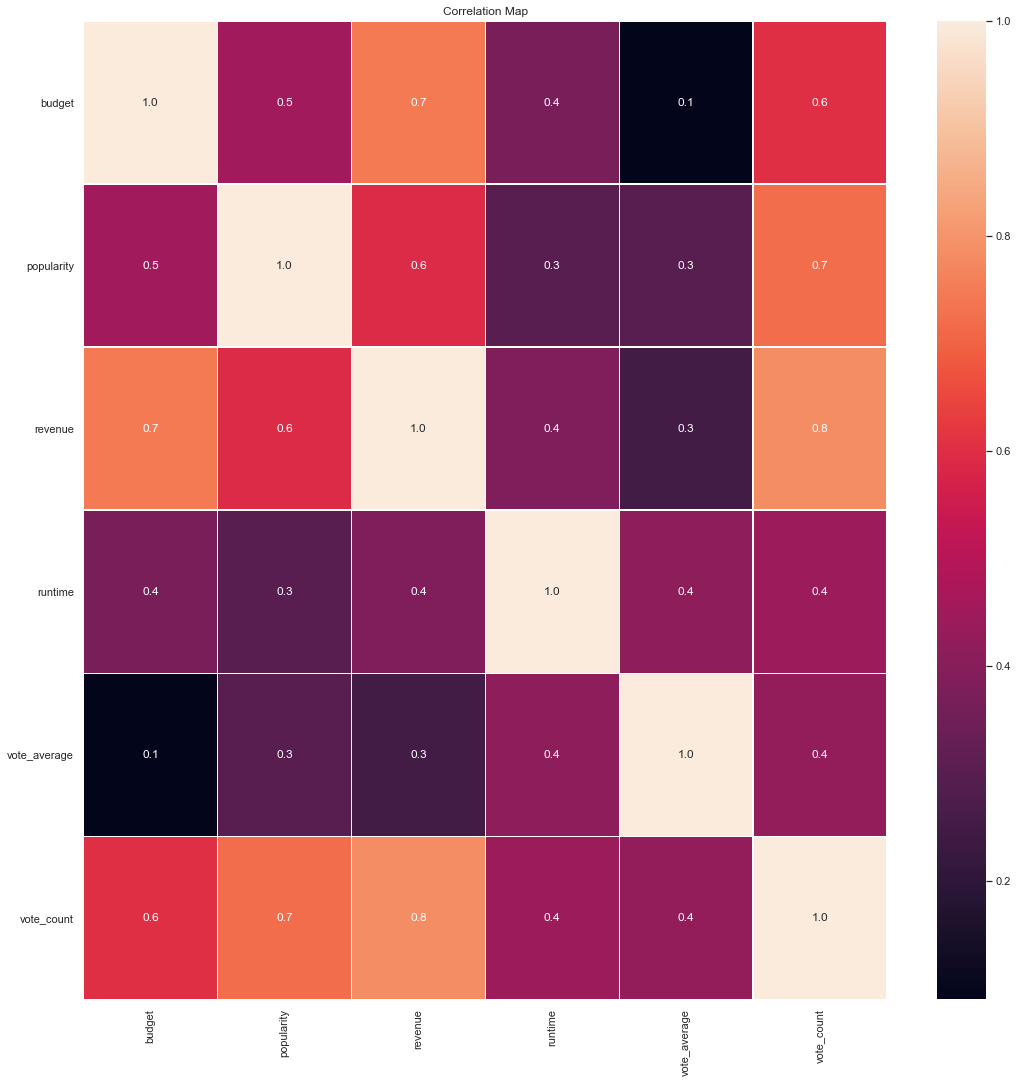

In [14]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_wo_null.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 2.5 Decriptive Analysis

In [15]:
df_wo_null = df_wo_null.drop(['status', 'original_title', 'overview'], axis = 1)

In [16]:
df_wo_null = df_wo_null.drop(['production_countries', 'original_language', 'crew', 'spoken_languages'], axis = 1)

In [17]:
df_wo_null = df_wo_null.drop(['runtime', 'keywords', 'vote_average', 'budget'], axis = 1)

In [18]:
df_wo_null.head()

,genres,popularity,production_companies,release_date,revenue,title,vote_count,cast
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,Avatar,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,Pirates of the Caribbean: At World's End,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,Spectre,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,The Dark Knight Rises,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,John Carter,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


# 3. Data Preparation

## 3.1 Recording of Categorical Variables

In [19]:
df_wo_null['genre1'] = df_wo_null['genres'].str.split(',').str[1]

In [20]:
df_wo_null['genre1'] = df_wo_null['genre1'].str.split(':').str[1]

In [21]:
df_wo_null['genre1'] = df_wo_null['genre1'].str.split('"').str[1]

In [22]:
df_wo_null['genre2'] = df_wo_null['genres'].str.split(',').str[3]

In [23]:
df_wo_null['genre2'] = df_wo_null['genre2'].str.split(':').str[1]

In [24]:
df_wo_null['genre2'] = df_wo_null['genre2'].str.split('"').str[1]

In [25]:
df_1 = df_wo_null.drop(['genres'], axis = 1)

In [26]:
df_1.isnull().sum()

popularity                0
production_companies      0
release_date              0
revenue                   0
title                     0
vote_count                0
cast                      0
genre1                    2
genre2                  232
dtype: int64

In [27]:
df_1["new_genres"] = df_1["genre1"] +","+ df_1["genre2"]

In [28]:
df_2 = df_1.drop(['genre1', 'genre2'], axis = 1)

In [29]:
df_2.isnull().sum()

popularity                0
production_companies      0
release_date              0
revenue                   0
title                     0
vote_count                0
cast                      0
new_genres              232
dtype: int64

In [30]:
df_2 = df_2.dropna(axis=0)

In [31]:
df_2['year'] = df_2['release_date'].str.split('-').str[0]

In [32]:
df_2['year'] = df_2['year'].astype(int)

In [33]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1262 non-null   float64
 1   production_companies  1262 non-null   object 
 2   release_date          1262 non-null   object 
 3   revenue               1262 non-null   int64  
 4   title                 1262 non-null   object 
 5   vote_count            1262 non-null   int64  
 6   cast                  1262 non-null   object 
 7   new_genres            1262 non-null   object 
 8   year                  1262 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 98.6+ KB


In [34]:
df_3 = df_2.drop(['release_date'], axis = 1)

In [35]:
df_3

,popularity,production_companies,revenue,title,vote_count,cast,new_genres,year
0,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,Avatar,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","Action,Adventure",2009
1,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,Pirates of the Caribbean: At World's End,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","Adventure,Fantasy",2007
2,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,Spectre,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","Action,Adventure",2015
3,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,The Dark Knight Rises,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","Action,Crime",2012
4,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,John Carter,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","Action,Adventure",2012
...,...,...,...,...,...,...,...,...
4764,27.662696,"[{""name"": ""Automatik Entertainment"", ""id"": 281...",600896,The Signal,631,"[{""cast_id"": 1, ""character"": ""Nic Eastman"", ""c...","Thriller,Science Fiction",2014
4772,3.277287,"[{""name"": ""FM Productions"", ""id"": 12601}, {""na...",321952,The Last Waltz,64,"[{""cast_id"": 1, ""character"": ""Himself"", ""credi...","Documentary,Music",1978
4778,1.330379,[],10000,Down Terrace,26,"[{""cast_id"": 4, ""character"": ""Bill"", ""credit_i...","Drama,Action",2009
4787,0.048948,[],0,Dry Spell,1,"[{""cast_id"": 4, ""character"": ""Sasha"", ""credit_...","Comedy,Romance",2013


In [36]:
df_3['cast'] = df_3['cast'].str.split(',').str[5]

In [37]:
df_3['cast'] = df_3['cast'].str.split(':').str[1]

In [38]:
df_3['cast'] = df_3['cast'].str.split('"').str[1]

In [39]:
df_3['production_companies'] = df_3['production_companies'].str.split(',').str[0]

In [40]:
df_3['production_companies'] = df_3['production_companies'].str.split(':').str[1]

In [41]:
df_3['production_companies'] = df_3['production_companies'].str.split('"').str[1]

In [42]:
df_3.isnull().sum()

popularity               0
production_companies    22
revenue                  0
title                    0
vote_count               0
cast                     5
new_genres               0
year                     0
dtype: int64

In [43]:
df_5 = df_3.dropna(axis=0)

# 4. Modelling and Evaluation

## 4.1 Test and Train Data

In [44]:
df_5.head()

,popularity,production_companies,revenue,title,vote_count,cast,new_genres,year
0,150.437577,Ingenious Film Partners,2787965087,Avatar,11800,Sam Worthington,"Action,Adventure",2009
1,139.082615,Walt Disney Pictures,961000000,Pirates of the Caribbean: At World's End,4500,Johnny Depp,"Adventure,Fantasy",2007
2,107.376788,Columbia Pictures,880674609,Spectre,4466,Daniel Craig,"Action,Adventure",2015
3,112.312950,Legendary Pictures,1084939099,The Dark Knight Rises,9106,Christian Bale,"Action,Crime",2012
4,43.926995,Walt Disney Pictures,284139100,John Carter,2124,Taylor Kitsch,"Action,Adventure",2012


In [45]:
df_6 = df_5.rename({"cast":"star"}, axis=1)

In [46]:
df_6.head()

,popularity,production_companies,revenue,title,vote_count,star,new_genres,year
0,150.437577,Ingenious Film Partners,2787965087,Avatar,11800,Sam Worthington,"Action,Adventure",2009
1,139.082615,Walt Disney Pictures,961000000,Pirates of the Caribbean: At World's End,4500,Johnny Depp,"Adventure,Fantasy",2007
2,107.376788,Columbia Pictures,880674609,Spectre,4466,Daniel Craig,"Action,Adventure",2015
3,112.312950,Legendary Pictures,1084939099,The Dark Knight Rises,9106,Christian Bale,"Action,Crime",2012
4,43.926995,Walt Disney Pictures,284139100,John Carter,2124,Taylor Kitsch,"Action,Adventure",2012


In [47]:
df_7 = df_6.drop(['year'], axis = 1)

In [48]:
df_cleaned = df_7.dropna(axis=0)

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>]],
      dtype=object)

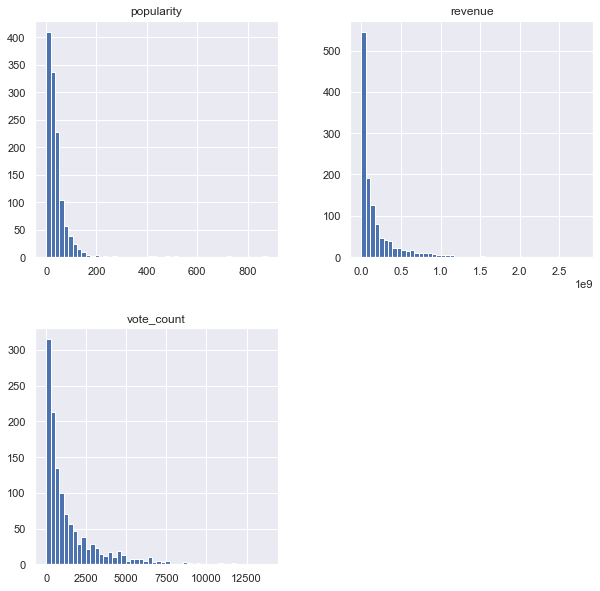

In [49]:
df_cleaned.hist(figsize=(10,10), bins=50)

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

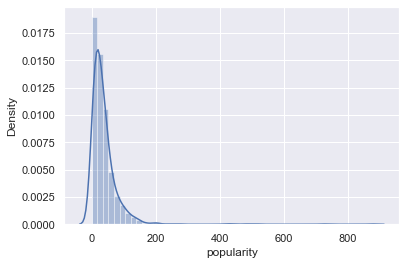

In [50]:
sns.distplot(df_cleaned['popularity'])

In [51]:
q = df_cleaned['popularity'].quantile(0.99)

data_1 = df_cleaned[df_cleaned['popularity']<q]

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

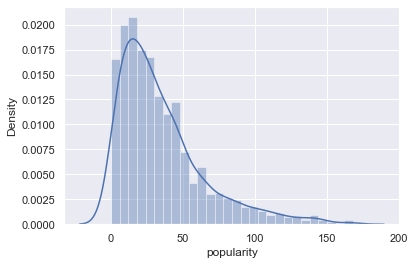

In [52]:
sns.distplot(data_1['popularity'])

In [53]:
q = data_1['vote_count'].quantile(0.01)

data_2 = data_1[data_1['vote_count']>q]

In [54]:
data_2.describe()

,popularity,revenue,vote_count
count,1208.000000,1.208000e+03,1208.000000
mean,35.506440,1.669286e+08,1405.486755
std,29.940760,2.455862e+08,1752.879308
min,0.132878,0.000000e+00,9.000000
25%,13.768277,1.529117e+07,279.250000
50%,27.153374,7.233776e+07,712.000000
75%,46.832955,2.054128e+08,1805.500000
max,167.932870,2.787965e+09,13752.000000


/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_count', ylabel='Density'>

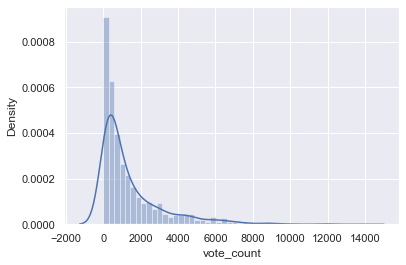

In [55]:
sns.distplot(data_2['vote_count'])

In [56]:
#q = data_2['revenue'].quantile(0.99)

data_3 = data_2[data_2['revenue']<1.5e+09]

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>]],
      dtype=object)

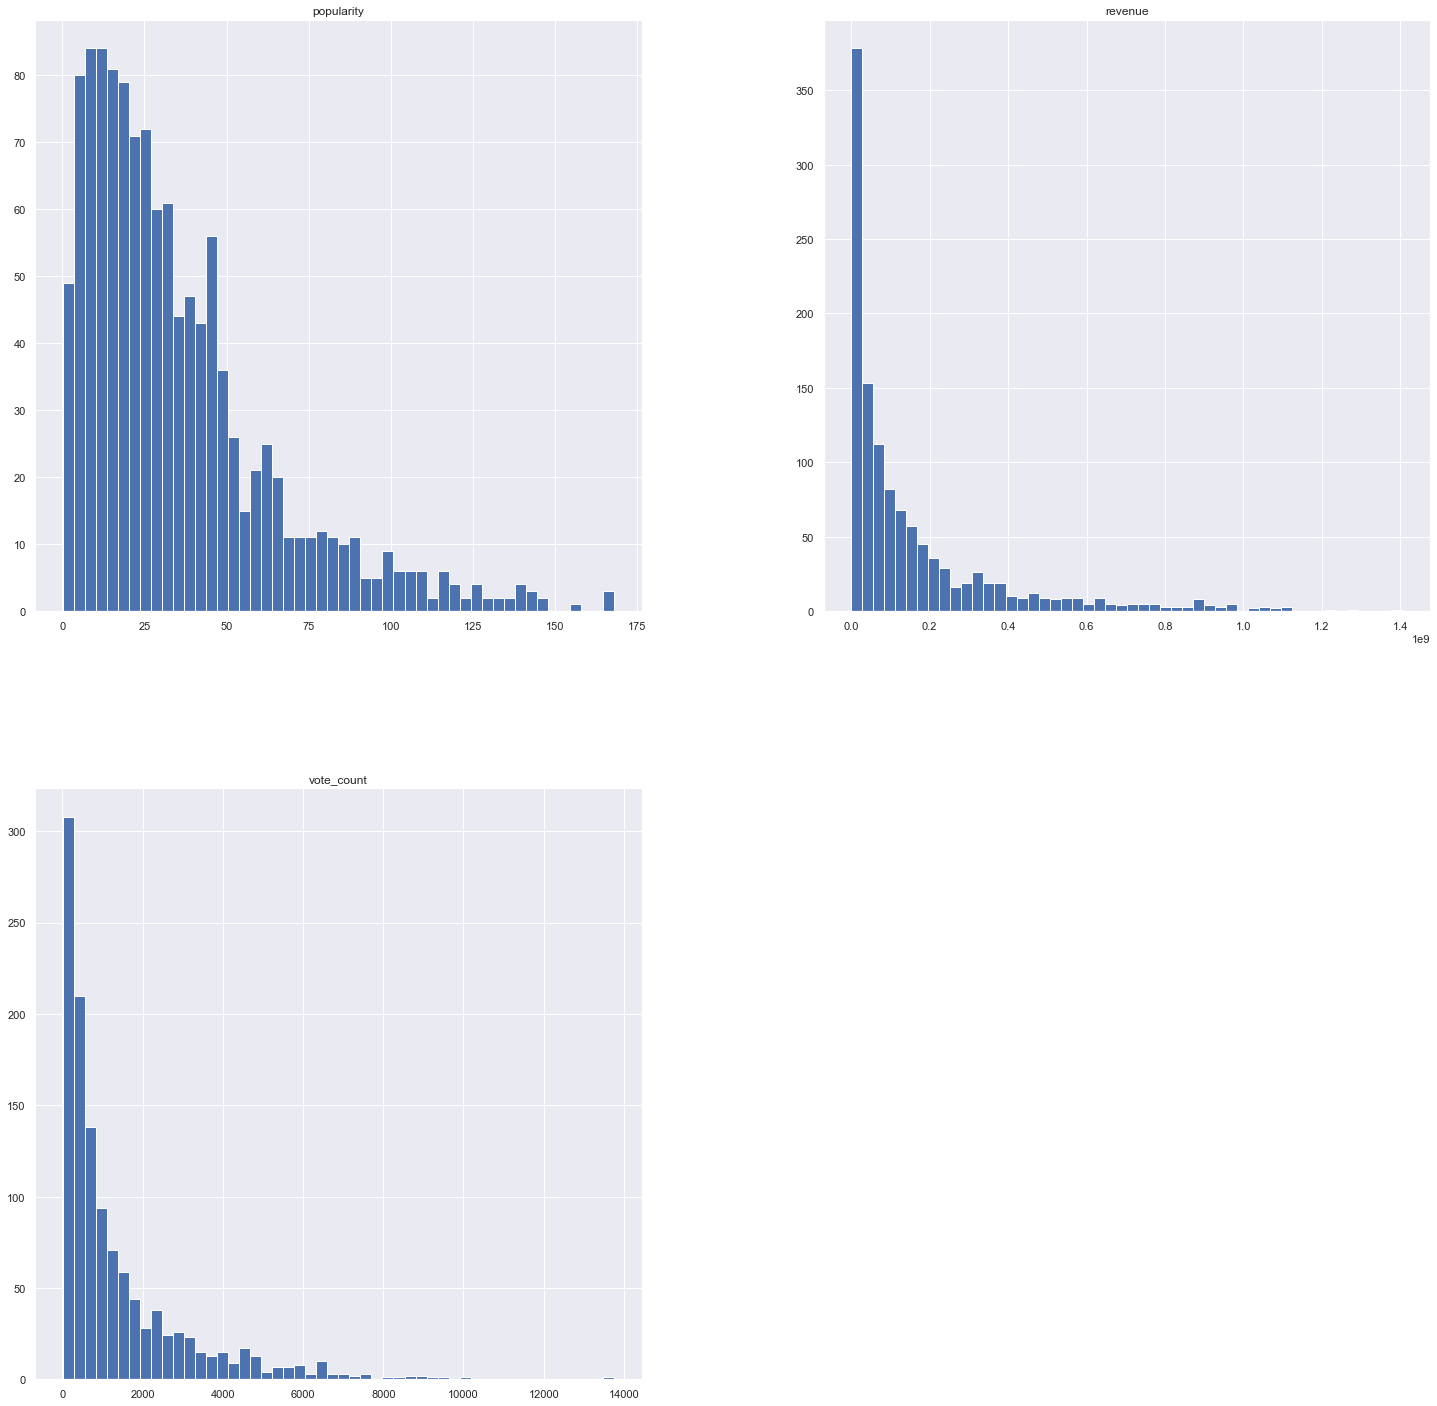

In [57]:
data_3.hist(figsize=(25,25), bins=50)

In [58]:
data_final = data_3.reset_index(drop=True)

In [59]:
data_final['revenue'] = data_final['revenue'].astype(float)

In [60]:
data_final.head()

,popularity,production_companies,revenue,title,vote_count,star,new_genres
0,139.082615,Walt Disney Pictures,9.610000e+08,Pirates of the Caribbean: At World's End,4500,Johnny Depp,"Adventure,Fantasy"
1,107.376788,Columbia Pictures,8.806746e+08,Spectre,4466,Daniel Craig,"Action,Adventure"
2,112.312950,Legendary Pictures,1.084939e+09,The Dark Knight Rises,9106,Christian Bale,"Action,Crime"
3,43.926995,Walt Disney Pictures,2.841391e+08,John Carter,2124,Taylor Kitsch,"Action,Adventure"
4,115.699814,Columbia Pictures,8.908716e+08,Spider-Man 3,3576,Tobey Maguire,"Fantasy,Action"


In [61]:
data_final.describe(include='all')

,popularity,production_companies,revenue,title,vote_count,star,new_genres
count,1205.000000,1205,1.205000e+03,1205,1205.000000,1205,1205
unique,NaN,413,NaN,1204,NaN,659,132
top,NaN,Universal Pictures,NaN,The Host,NaN,Matt Damon,"Comedy,Drama"
freq,NaN,91,NaN,2,NaN,14,73
mean,35.267109,NaN,1.622383e+08,NaN,1383.145228,NaN,NaN
std,29.569232,NaN,2.255582e+08,NaN,1693.870514,NaN,NaN
min,0.132878,NaN,0.000000e+00,NaN,9.000000,NaN,NaN
25%,13.707843,NaN,1.525000e+07,NaN,277.000000,NaN,NaN
50%,27.082182,NaN,7.210861e+07,NaN,705.000000,NaN,NaN
75%,46.630062,NaN,2.034276e+08,NaN,1798.000000,NaN,NaN


In [62]:
data_final.isnull().sum()

popularity              0
production_companies    0
revenue                 0
title                   0
vote_count              0
star                    0
new_genres              0
dtype: int64

In [63]:
data_final.columns.values

array(['popularity', 'production_companies', 'revenue', 'title',
       'vote_count', 'star', 'new_genres'], dtype=object)

In [64]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1205 non-null   float64
 1   production_companies  1205 non-null   object 
 2   revenue               1205 non-null   float64
 3   title                 1205 non-null   object 
 4   vote_count            1205 non-null   int64  
 5   star                  1205 non-null   object 
 6   new_genres            1205 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 66.0+ KB


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Since categorical data is not preprocessed, take only the numerical data.
variables = data_final[['revenue', 'vote_count']]

# Create a new data frame which includes all VIFs (Variance Inflation Factor)
# Each variable has its own variance inflation factor. This measure is variable specific
vif = pd.DataFrame()

# Make use of the variance_inflation_factor module, output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Include variable names so it is easier to explore the result
vif["Features"] = variables.columns

In [66]:
# Explore the result
vif

,VIF,Features
0,3.741807,revenue
1,3.741807,vote_count


In [67]:
# Remove 'Year' as feature with the highest VIF from the model
data_final = data_final.drop(['star', 'production_companies'],axis=1)

In [68]:
data_final.describe(include='all')

,popularity,revenue,title,vote_count,new_genres
count,1205.000000,1.205000e+03,1205,1205.000000,1205
unique,NaN,NaN,1204,NaN,132
top,NaN,NaN,The Host,NaN,"Comedy,Drama"
freq,NaN,NaN,2,NaN,73
mean,35.267109,1.622383e+08,NaN,1383.145228,NaN
std,29.569232,2.255582e+08,NaN,1693.870514,NaN
min,0.132878,0.000000e+00,NaN,9.000000,NaN
25%,13.707843,1.525000e+07,NaN,277.000000,NaN
50%,27.082182,7.210861e+07,NaN,705.000000,NaN
75%,46.630062,2.034276e+08,NaN,1798.000000,NaN


In [69]:
data_with_dummies = pd.get_dummies(data_final, drop_first=True)

In [70]:
data_with_dummies.head()

,popularity,revenue,vote_count,title_(500) Days of Summer,title_10 Cloverfield Lane,title_12 Rounds,title_13 Hours: The Secret Soldiers of Benghazi,title_1408,title_1911,title_2 Guns,...,"new_genres_Thriller,Crime","new_genres_Thriller,Documentary","new_genres_Thriller,Drama","new_genres_Thriller,Horror","new_genres_Thriller,Mystery","new_genres_Thriller,Science Fiction","new_genres_War,Action","new_genres_War,Crime","new_genres_War,Drama","new_genres_Western,Drama"
0,139.082615,9.610000e+08,4500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.376788,8.806746e+08,4466,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,112.312950,1.084939e+09,9106,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43.926995,2.841391e+08,2124,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,115.699814,8.908716e+08,3576,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
target = data_with_dummies['popularity']
predictors = data_with_dummies.drop(['popularity'],axis=1)

In [72]:
# 80-20 split into training and test data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=123)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [75]:
print('training performance')
print(reg.score(X_train,y_train))
print('test performance')
print(reg.score(X_test,y_test))

training performance
1.0
test performance
0.5546065264388957


## 4.2 Linear Regression

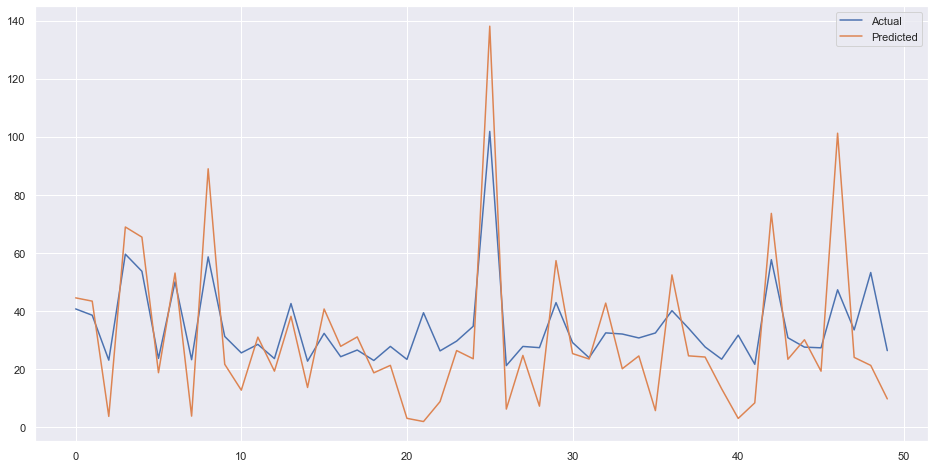

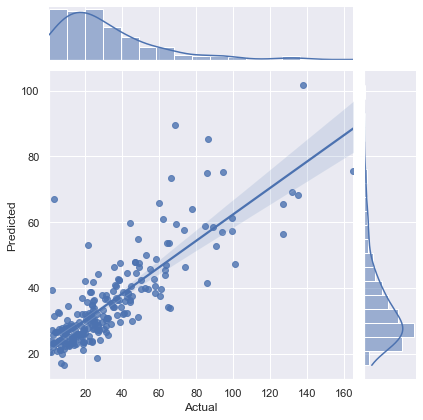

In [76]:
y_pred = reg.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);